# Preliminary work

- I found one of the datasets from the paper
- I chose 1 of the features which seemed most appropriate for a polynomial fit for linear regression (basically exactly what the paper did)
- Below is some preliminary work where I conduct standard linear regression and then polynomial linear regression using existing package sklearn
- I show MSE for both fits

In [56]:
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [57]:
dataframe = pd.read_excel('dataset1/dataset1.xlsx')
print(dataframe.shape)
dataframe.describe()

(9568, 5)


,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [58]:
X = dataframe['V'].sort_values()
y = dataframe['AT'][X.index].values

X = np.reshape(X.values, (-1,1))

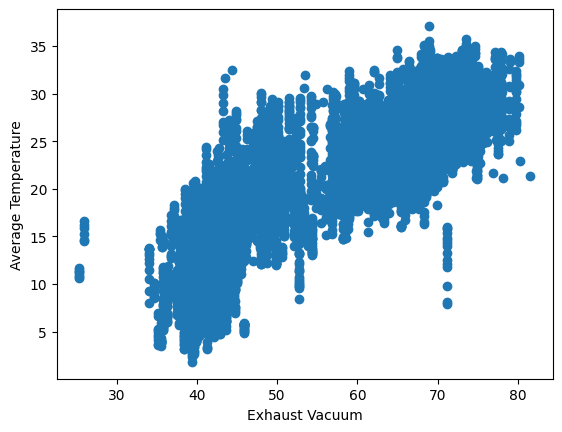

In [59]:
plt.scatter(X, y)
plt.xlabel("Exhaust Vacuum")
plt.ylabel("Average Temperature")
plt.show()

In [70]:
lr = LinearRegression()
lr.fit(X, y)
y_hat_sklearn = lr.predict(X)

pr = PolynomialFeatures(degree=3)
X_poly = pr.fit_transform(X)
lr_poly = LinearRegression()
lr_poly.fit(X_poly, y)
y_hat_poly_sklearn = lr_poly.predict(X_poly)


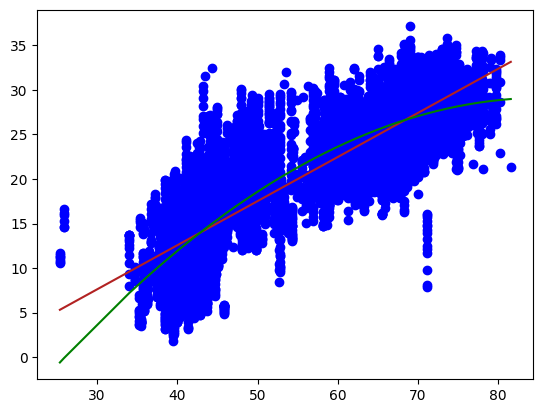

In [71]:
plt.scatter(X, y, color = 'blue')
plt.plot(X, y_hat_sklearn, color = 'firebrick')
plt.plot(X, y_hat_poly_sklearn, color = 'green')
plt.show()

In [73]:
y_hat_sklearn = lr.predict(X)
y_hat_poly_sklearn = lr_poly.predict(X_poly)

print("mean squared error for standard linear:", mean_squared_error(y, y_hat_sklearn))
print("mean squared error for linear polynomial:", mean_squared_error(y, y_hat_poly_sklearn))

mean squared error for standard linear: 15.964998111813276
mean squared error for linear polynomial: 15.095045968653695


# Going from built-in package to implementing it ourselves

- Now using the dataset, I will conduct linear regression, but this time using matrix multiplication and numpy.
- I will implement a closed-form based based algorithm before moving onto a gradient descent based algorithm.

In [82]:
# Converts an (N * 1) matrix into a (N * h) matrix where h is the number of basis functions ()
# The degree of the polynomial is (h-1)
def polynomial_basis_function_transformation(X, h):
    powers = np.arange(h)
    X_poly = np.power(X, powers)
    return X_poly

def apply_lin_reg_poly_basis(X, y, h):
    X_poly = polynomial_basis_function_transformation(X, h)
    beta_hat_poly = np.linalg.pinv(X_poly.T @ X_poly) @ X_poly.T @ y
    y_hat_poly = X_poly @ beta_hat_poly
    return y_hat_poly


In [85]:
y_hat_poly = apply_lin_reg_poly_basis(X, y, 4)

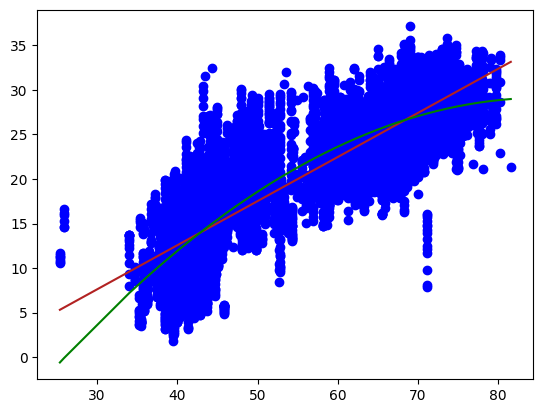

mean squared error for linear polynomial through numpy: 15.09504596865373


In [86]:
plt.scatter(X, y, color = 'blue')
plt.plot(X, y_hat_sklearn, color = 'firebrick')
plt.plot(X, y_hat_poly, color = 'green')
plt.show()

print("mean squared error for linear polynomial through numpy:", mean_squared_error(y, y_hat_poly))